<a href="https://colab.research.google.com/github/pankajmahato907/AI_Workshops/blob/main/Workshop5_AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Data Understanding and Visualization:

In [ ]:
!pip install gdown

!gdown 12dBHB_f5jCOcalsV8Cp38u54tgkwcVT8

!unzip "FruitinAmazon.zip"

Downloading...
From: https://drive.google.com/uc?id=12dBHB_f5jCOcalsV8Cp38u54tgkwcVT8
To: /content/FruitinAmazon.zip
100% 1.24M/1.24M [00:00<00:00, 12.9MB/s]
Archive:  FruitinAmazon.zip
replace FruitinAmazon/test/cupuacu/download (5).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: Fru

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from PIL import Image
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
train_path = "FruitinAmazon/train/"
test_path = "FruitinAmazon/test/"

In [ ]:
os.listdir(train_path)

['acai', 'graviola', 'cupuacu', 'pupunha', 'tucuma', 'guarana']

In [ ]:
def visualise(train_path):

  class_dirs = []
  for folder in os.listdir(train_path):
    class_dirs.append(folder)

  images = []
  labels = []

  for class_dir in class_dirs:
    class_path = os.path.join(train_path, class_dir)

    image_files = []
    for image in os.listdir(class_path):
      image_files.append(image)

    random_image_file = random.choice(image_files)
    image_path = os.path.join(class_path, random_image_file)

    images.append(plt.imread(image_path))
    labels.append(class_dir)

  fig, axes = plt.subplots(2, len(class_dirs) // 2, figsize = (12, 6))

  for i, (image, label) in enumerate(zip(images, labels)):
    row = i // (len(class_dirs) // 2)
    col = i % (len(class_dirs) // 2)

    axes[row, col].imshow(image)
    axes[row, col].set_title(label)
    axes[row, col].axis('off')

  plt.show()

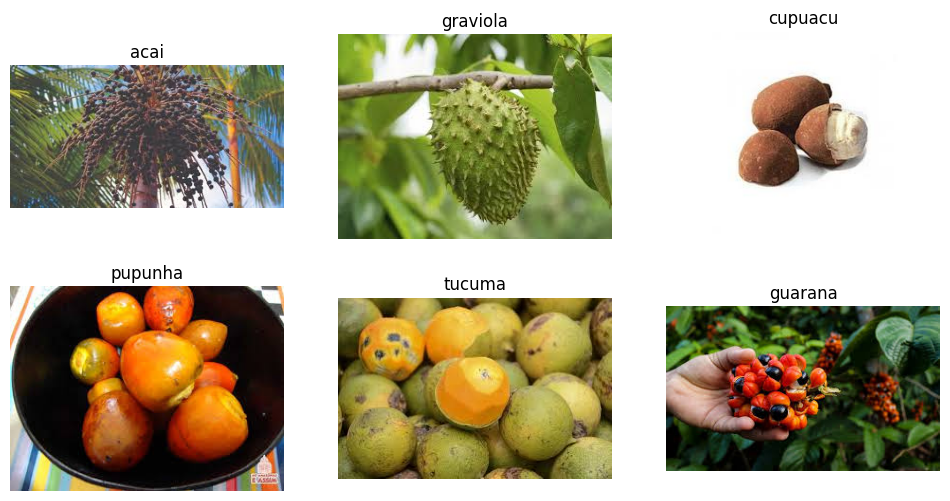

In [ ]:
visualise(train_path)

In [ ]:
def check_for_corrupted(dir):
  sub_dir = []
  for folder in os.listdir(dir):
    sub_dir.append(folder)

  for dir in sub_dir:
    class_path = os.path.join(train_path, dir)

    image_files = []
    for image in os.listdir(class_path):
      image_files.append(image)

      for image in image_files:
        image = os.path.join(class_path, image)

        try:
          with Image.open(image) as img:
            img.verify()
        except Exception as e:
          print(f"Corrupted image found {image}")
  print("No corrupted image found")

check_for_corrupted(train_path)

No corrupted image found


# Task 2: Loading and Preprocessing Image Data in keras:

In [ ]:
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 30 files belonging to 6 classes.
Found 30 files belonging to 6 classes.


# Task 3 - Implement a CNN with Convolutional Architecture:

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Task 4: Train the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
]

history = model.fit(
    train_ds,
    epochs=250,
    batch_size=16,
    validation_data=val_ds,
    callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.1506 - loss: 1.7942 - val_accuracy: 0.1667 - val_loss: 1.8556
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1832 - loss: 1.7185 - val_accuracy: 0.1667 - val_loss: 1.5999
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 588ms/step - accuracy: 0.4852 - loss: 1.4642 - val_accuracy: 0.2667 - val_loss: 1.4802
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 572ms/step - accuracy: 0.5161 - loss: 1.1890 - val_accuracy: 0.5333 - val_loss: 1.2161
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 830ms/step - accuracy: 0.6918 - loss: 0.8009 - val_accuracy: 0.3667 - val_loss: 1.3796
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 0.6458 - loss: 0.7566 - val_accuracy: 0.5333 - val_loss: 1.4727
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 575ms/step - accuracy: 0.7865 - loss: 0.5988 - val_accuracy: 0.6333 - val_loss: 1.1321
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 578ms/step - accuracy: 0.8759 - loss: 0.4033 - val_accuracy: 0.5667 - val_los

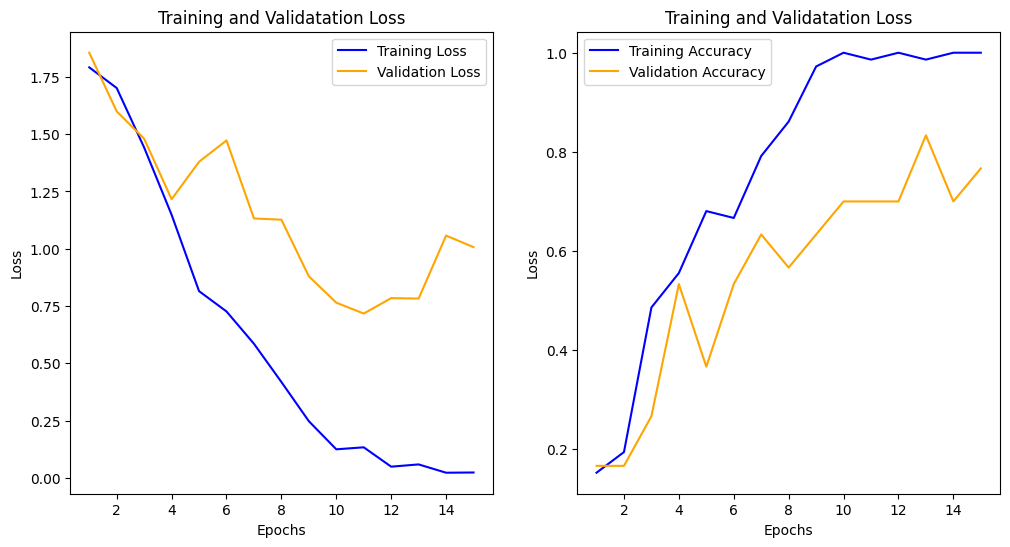

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validatation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validatation Loss')
plt.legend()

plt.show()

# Task 5: Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.7000 - loss: 0.7171
Test Accuracy: 0.7000


In [ ]:
model.save('bestest_model.h5')

bestest_model = tf.keras.models.load_model('bestest_model.h5')

# Task 7: Predictions and Classification Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_pred_prob = bestest_model.predict(test_ds)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = []
for images, labels in test_ds.unbatch():
  y_true.append(labels.numpy())

y_true = np.array(y_true)
print(y_true)
print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.50      1.00      0.67         5
           2       1.00      0.80      0.89         5
           3       0.62      1.00      0.77         5
           4       1.00      0.40      0.57         5
           5       1.00      0.40      0.57         5

    accuracy                           0.70        30
   macro avg       0.81      0.70      0.69        30
weighted avg       0.81      0.70      0.69        30

